In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

data = np.load("noise_spectrums/seismic_mean.npz")
f = data["f"]
seismic = data["data"]

log_interp = scipy.interpolate.interp1d(np.log10(f), np.log10(seismic), fill_value="extrapolate")

f_ = np.logspace(-4, 2, 1024)
seismic_interp = log_interp(np.log10(f__[f__>0]))

In [15]:
seismic_inter = log_interp(f__)

In [24]:
seismic_interp

array([  -6.37901902,   -6.37901902,   -6.37901902, ..., 4661.97921237,
       4661.99817863, 4662.01714481])

In [14]:
seismic_interp = 10**log_interp(f__[f__>0])

/tmp/ipykernel_1754667/1822139851.py:1: RuntimeWarning: overflow encountered in power
  seismic_interp = 10**log_interp(f__[f__>0])


In [10]:
n_data = int(512*4096)
nperseg = 524288
data = np.random.normal(loc=0, scale=1, size=n_data)
f__, _ = scipy.signal.welch(data, fs=512, nperseg=nperseg)


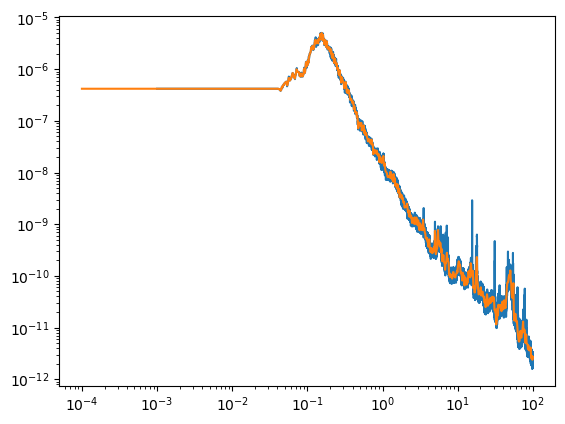

In [8]:
plt.loglog(f, seismic)
plt.loglog(f_, seismic_interp)